# Imports and init

In [1]:
import keyring
import requests
import pandas
import matplotlib

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
password = keyring.get_password("morten-dev","mof")
hubNr = "8a651472"
apiurl = f"https://datahub-{hubNr}.sesam.cloud/api/"
header = {'Authorization': 'Bearer ' + password,'Content-type': "application/json"}

# Node info

In [5]:
resp_api = requests.get(apiurl)
tmp = resp_api.json()

In [6]:
str(tmp)

"{'_id': 'sesam:node', 'type': 'sesam:node', 'subjectidentifier': 'sesam:node', 'status': {'git-revision': 'ea6b0b149', 'teamcity-buildnumber': '200327.991', 'version': '0.4.200327.991', 'feature-level': 4, 'revision': 'ea6b0b149', 'build-date': '2020-03-27T17:26:36.854798+00:00', 'start_time': '2020-03-30T01:35:11Z', 'uptime': '1 days, 8 hours, 56 minutes, 11 seconds', 'configuration-is-read-only': False, 'license-is-invalid': False, 'authentication-is-required': True, 'health_status': {'status': 'ok'}, 'remote_addr': '95.34.151.11', 'authenticated-user': None, 'sesam-portal-url': 'https://portal.sesam.io/unified/'}}"

# Systems

In [7]:
url_systems = apiurl+f"systems"
resp_systems = requests.get(url_systems,headers=header)
df_systems = pandas.json_normalize(resp_systems.json())

In [8]:
df_systems

,_id,subjectidentifier,config.original._id,config.original.name,config.original.type,config.effective._id,config.effective.name,config.effective.type,config.audit,runtime.is-valid-config,...,config.original.operations.get-by-name.url,config.original.operations.get-by-orgnr.method,config.original.operations.get-by-orgnr.url,config.effective.operations.get-by-naeringskode.method,config.effective.operations.get-by-naeringskode.url,config.effective.operations.get-by-name.method,config.effective.operations.get-by-name.url,config.effective.operations.get-by-orgnr.method,config.effective.operations.get-by-orgnr.url,config.original.port
0,system:sesam-node,http://system:sesam-node,system:sesam-node,Sesam node,system:sesam-node,system:sesam-node,Sesam node,system:sesam-node,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,url-test,http://url-test,url-test,NaN,system:url,url-test,NaN,system:url,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,import-order,http://import-order,import-order,NaN,system:microservice,import-order,NaN,system:microservice,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dummy-zendesk,http://dummy-zendesk,dummy-zendesk,NaN,system:microservice,dummy-zendesk,NaN,system:microservice,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,zendesk-ticket-audit-transform,http://zendesk-ticket-audit-transform,zendesk-ticket-audit-transform,NaN,system:microservice,zendesk-ticket-audit-transform,NaN,system:microservice,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,zendesk-new-ticket-transform,http://zendesk-new-ticket-transform,zendesk-new-ticket-transform,NaN,system:microservice,zendesk-new-ticket-transform,NaN,system:microservice,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,zendesk-ms,http://zendesk-ms,zendesk-ms,NaN,system:microservice,zendesk-ms,NaN,system:microservice,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,fastapi-demo,http://fastapi-demo,fastapi-demo,NaN,system:microservice,fastapi-demo,NaN,system:microservice,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,test-db,http://test-db,test-db,NaN,system:postgresql,test-db,NaN,system:postgresql,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,aarsregnskaap,http://aarsregnskaap,aarsregnskaap,NaN,system:rest,aarsregnskaap,NaN,system:rest,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
systems_by_type = df_systems.groupby("config.effective.type")['_id'].count()
systems_by_type

config.effective.type
system:microservice      6
system:mssql-azure-dw    2
system:postgresql        1
system:rest              3
system:sesam-node        1
system:url               1
Name: _id, dtype: int64

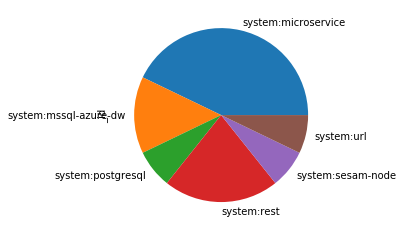

In [10]:
systems_by_type.plot(kind="pie")

# Pipes

## All pipes

In [11]:
url_pipes = apiurl+f"pipes"
url_pipes
resp_pipes = requests.get(url_pipes,headers=header)

In [12]:
df_pipes = pandas.json_normalize(resp_pipes.json(),max_level=0)
df_pipes.drop(columns=['config','runtime',"subjectidentifier"])

,_id,storage
0,import-orders-ms,6157
1,generic-test,4540
2,letters,10290
3,generic-test2,5144
4,generic-test-,2239
5,myzen,6301
6,zendesk-ticket-audit,0
7,zendesk-ticket,487252
8,zendesk-new-ticket-test,48895
9,zendesk-update-ticket-test,3061


In [13]:
df_tmp = pandas.DataFrame.from_dict(resp_pipes.json())

In [14]:
pandas.json_normalize(df_tmp['runtime'],max_level=0)[["last-run","last-message","average-process-time"]]

,last-run,last-message,average-process-time
0,2020-03-31T10:21:33.416982+00:00,Completed OK in 0.06s.,21.647333
1,,None,NaN
2,2020-03-31T10:27:35.090515+00:00,Completed OK in 0.00s.,0.148828
3,,None,NaN
4,2020-03-31T10:30:09.397861+00:00,Completed OK in 0.01s.,NaN
5,2020-03-31T10:27:29.078213+00:00,Completed OK in 0.00s.,0.798000
6,,None,NaN
7,2019-12-19T14:36:19.425884+00:00,Completed OK in 0.63s.,14.947881
8,2019-12-23T07:50:11.312965+00:00,Completed OK in 1.18s.,183.139000
9,,None,NaN


In [15]:
df_pipes[df_pipes.columns.to_list()[:]]

,_id,subjectidentifier,config,runtime,storage
0,import-orders-ms,http://import-orders-ms,"{'original': {'_id': 'import-orders-ms', 'sour...","{'queues': {}, 'last-started': '2020-03-31T10:...",6157
1,generic-test,http://generic-test,"{'original': {'_id': 'generic-test', 'pump': {...","{'queues': {'source': 68, 'dependencies': {}},...",4540
2,letters,http://letters,"{'original': {'_id': 'letters', 'source': {'en...","{'queues': {'source': {}}, 'last-started': '20...",10290
3,generic-test2,http://generic-test2,"{'original': {'_id': 'generic-test2', 'pump': ...","{'queues': {'source': 58, 'dependencies': {}},...",5144
4,generic-test-,http://generic-test-,"{'original': {'_id': 'generic-test-', 'sink': ...","{'queues': {'source': 0}, 'last-started': '202...",2239
5,myzen,http://myzen,"{'original': {'_id': 'myzen', 'source': {'enti...","{'queues': {'source': {}}, 'last-started': '20...",6301
6,zendesk-ticket-audit,http://zendesk-ticket-audit,"{'original': {'_id': 'zendesk-ticket-audit', '...","{'queues': {'source': 12, 'dependencies': {}},...",0
7,zendesk-ticket,http://zendesk-ticket,"{'original': {'_id': 'zendesk-ticket', 'pump':...","{'queues': {}, 'last-started': '2019-12-19T14:...",487252
8,zendesk-new-ticket-test,http://zendesk-new-ticket-test,{'original': {'_id': 'zendesk-new-ticket-test'...,"{'queues': {'source': {}, 'dependencies': {}},...",48895
9,zendesk-update-ticket-test,http://zendesk-update-ticket-test,{'original': {'_id': 'zendesk-update-ticket-te...,"{'queues': {'source': {}, 'dependencies': {}},...",3061


In [16]:
pipe_list = list(df_pipes._id)

In [18]:
df_pipes2 = pandas.json_normalize(resp_pipes.json())

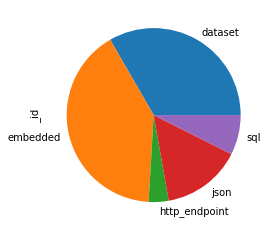

In [19]:
df_pipes2.groupby("config.original.source.type")._id.count().plot(kind="pie")

## Generate-schema-definition

In [20]:
df_pipes[df_pipes['_id'].str.contains('brreg')]

,_id,subjectidentifier,config,runtime,storage
18,test-rest-brreg-navn,http://test-rest-brreg-navn,"{'original': {'_id': 'test-rest-brreg-navn', '...","{'queues': {'source': {}, 'dependencies': {}},...",14904
19,test-rest-brreg-naeringskode,http://test-rest-brreg-naeringskode,{'original': {'_id': 'test-rest-brreg-naerings...,"{'queues': {'source': {}, 'dependencies': {}},...",36616
20,test-rest-brreg-naeringskod-csv-endpoint,http://test-rest-brreg-naeringskod-csv-endpoint,{'original': {'_id': 'test-rest-brreg-naerings...,"{'queues': {}, 'last-started': '', 'last-run':...",0


In [21]:
pipeId = df_pipes.iloc[19]['_id']
pipeId

'test-rest-brreg-naeringskode'

In [22]:
url_schema = apiurl+f"pipes/{pipeId}/generate-schema-definition" #?sample_size=20&keys_only=true"

In [23]:
resp_schema = requests.get(url_schema,headers=header)

In [24]:
resp_schema.text

'[{"type": "string", "max_size": 9, "min_size": 9, "source_property": "organisasjonsnummer", "name": "organisasjonsnummer"}, {"type": "string", "max_size": 44, "min_size": 6, "source_property": "navn", "name": "navn"}, {"type": "string", "max_size": 10, "min_size": 10, "source_property": "registreringsdatoEnhetsregisteret", "name": "registreringsdatoEnhetsregisteret"}, {"type": "boolean", "source_property": "registrertIMvaregisteret", "name": "registrertIMvaregisteret"}, {"type": "integer", "max_value": 5, "min_value": 0, "source_property": "antallAnsatte", "name": "antallAnsatte"}, {"type": "string", "max_size": 10, "min_size": 10, "source_property": "stiftelsesdato", "name": "stiftelsesdato", "allow_null": true}, {"type": "boolean", "source_property": "registrertIForetaksregisteret", "name": "registrertIForetaksregisteret"}, {"type": "boolean", "source_property": "registrertIStiftelsesregisteret", "name": "registrertIStiftelsesregisteret"}, {"type": "boolean", "source_property": "reg

In [25]:
df_schema = pandas.json_normalize(resp_schema.json())
df_schema

,type,max_size,min_size,source_property,name,max_value,min_value,allow_null
0,string,9.0,9.0,organisasjonsnummer,organisasjonsnummer,NaN,NaN,NaN
1,string,44.0,6.0,navn,navn,NaN,NaN,NaN
2,string,10.0,10.0,registreringsdatoEnhetsregisteret,registreringsdatoEnhetsregisteret,NaN,NaN,NaN
3,boolean,NaN,NaN,registrertIMvaregisteret,registrertIMvaregisteret,NaN,NaN,NaN
4,integer,NaN,NaN,antallAnsatte,antallAnsatte,5.0,0.0,NaN
5,string,10.0,10.0,stiftelsesdato,stiftelsesdato,NaN,NaN,True
6,boolean,NaN,NaN,registrertIForetaksregisteret,registrertIForetaksregisteret,NaN,NaN,NaN
7,boolean,NaN,NaN,registrertIStiftelsesregisteret,registrertIStiftelsesregisteret,NaN,NaN,NaN
8,boolean,NaN,NaN,registrertIFrivillighetsregisteret,registrertIFrivillighetsregisteret,NaN,NaN,NaN
9,string,4.0,4.0,sisteInnsendteAarsregnskap,sisteInnsendteAarsregnskap,NaN,NaN,True


## Entities

In [26]:
url_entities = apiurl+f"pipes/{pipeId}/entities?limit=10"
resp_entities = requests.get(url_entities,headers=header)
df_entities = pandas.json_normalize(resp_entities.json())
df_entities

,_id,organisasjonsnummer,navn,registreringsdatoEnhetsregisteret,registrertIMvaregisteret,antallAnsatte,stiftelsesdato,registrertIForetaksregisteret,registrertIStiftelsesregisteret,registrertIFrivillighetsregisteret,...,forretningsadresse.poststed,forretningsadresse.adresse,forretningsadresse.kommune,forretningsadresse.kommunenummer,institusjonellSektorkode.kode,institusjonellSektorkode.beskrivelse,_links.self.href,naeringskode2.beskrivelse,naeringskode2.kode,naeringskode2.hjelpeenhetskode
0,get-by-naeringskode~CONSEPTO-ELEKTRO-AS,920240070,CONSEPTO ELEKTRO AS,2018-01-15,True,1,2018-01-01,True,False,False,...,TRONDHEIM,[Sluppenvegen 6],TRONDHEIM,5001,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
1,get-by-naeringskode~SOB-INSTALLASJON-AS,920599540,SOB INSTALLASJON AS,2018-03-14,True,1,2018-03-02,True,False,False,...,BODØ,[Greisdalsveien 19],BODØ,1804,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
2,get-by-naeringskode~MN-ELEKTRO-AS,921298714,MN ELEKTRO AS,2018-08-27,True,1,2018-08-08,True,False,False,...,OSLO,[Islands gate 7],OSLO,0301,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
3,get-by-naeringskode~STØYT-AS,921335849,STØYT AS,2018-09-03,False,0,2018-08-20,True,False,False,...,ÅKREHAMN,[Øyavegen 1],KARMØY,1149,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
4,get-by-naeringskode~T-G-ELEKTRO-AS,921652356,T-G ELEKTRO AS,2018-11-02,False,0,2018-10-12,True,False,False,...,RANHEIM,[Væretrøa 206],TRONDHEIM,5001,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
5,get-by-naeringskode~SOUND-MASKING-SKANDINAVIA-AS,921835191,SOUND MASKING SKANDINAVIA AS,2018-12-05,False,0,2018-09-21,True,False,False,...,TRONDHEIM,[Granåsvegen 13],TRONDHEIM,5001,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
6,get-by-naeringskode~BRODAL-ELEKTRO-AS,921882300,BRODAL ELEKTRO AS,2018-12-13,True,2,2018-11-19,True,False,False,...,OSLO,[Valdresgata 16C],OSLO,0301,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
7,get-by-naeringskode~DATALEC-PRECISION-INSTALLA...,922052352,DATALEC PRECISION INSTALLATIONS AS,2019-02-19,False,0,2018-11-21,True,False,False,...,OSLO,[Cort Adelers gate 16],OSLO,0301,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
8,get-by-naeringskode~FORUS-ELEKTRO-AS,918173447,FORUS ELEKTRO AS,2016-12-22,True,0,2016-11-24,True,False,False,...,TJELTA,[Vigdelsvegen 529],SOLA,1124,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,NaN,NaN,NaN
9,get-by-naeringskode~HARESTAD-ELEKTRISKE-HOLDIN...,918330984,HARESTAD ELEKTRISKE HOLDING AS,2017-01-06,True,0,2016-12-23,True,False,False,...,RANDABERG,[Torvmyrveien 26],RANDABERG,1127,2100,Private aksjeselskaper mv.,https://data.brreg.no/enhetsregisteret/api/enh...,Uoppgitt,00.000,True


In [27]:
df_entities.dtypes

_id                                          object
organisasjonsnummer                          object
navn                                         object
registreringsdatoEnhetsregisteret            object
registrertIMvaregisteret                       bool
antallAnsatte                                 int64
stiftelsesdato                               object
registrertIForetaksregisteret                  bool
registrertIStiftelsesregisteret                bool
registrertIFrivillighetsregisteret             bool
sisteInnsendteAarsregnskap                   object
konkurs                                        bool
underAvvikling                                 bool
underTvangsavviklingEllerTvangsopplosning      bool
maalform                                     object
organisasjonsform.kode                       object
organisasjonsform.beskrivelse                object
organisasjonsform._links.self.href           object
naeringskode1.beskrivelse                    object
naeringskode

In [28]:
df_tmp3 = df_entities.copy()
map_tmp = list(map(lambda s:tuple(str.split(s,'.')),list(df_tmp3.columns)))

In [45]:
df_tmp4 = df_entities.copy()
map_tmp2 = list(map(lambda s:list(str.split(s,'.')),list(df_tmp4.columns)))
map_tmp3 = pandas.DataFrame(map_tmp2).fillna('')

In [56]:
df_tmp3.columns = pandas.MultiIndex.from_frame(map_tmp3)

In [69]:
[f'{i} ({j})' for i,j in zip(df_entities.columns, df_entities.dtypes)]

['_id (object)',
 'organisasjonsnummer (object)',
 'navn (object)',
 'registreringsdatoEnhetsregisteret (object)',
 'registrertIMvaregisteret (bool)',
 'antallAnsatte (int64)',
 'stiftelsesdato (object)',
 'registrertIForetaksregisteret (bool)',
 'registrertIStiftelsesregisteret (bool)',
 'registrertIFrivillighetsregisteret (bool)',
 'sisteInnsendteAarsregnskap (object)',
 'konkurs (bool)',
 'underAvvikling (bool)',
 'underTvangsavviklingEllerTvangsopplosning (bool)',
 'maalform (object)',
 'organisasjonsform.kode (object)',
 'organisasjonsform.beskrivelse (object)',
 'organisasjonsform._links.self.href (object)',
 'naeringskode1.beskrivelse (object)',
 'naeringskode1.kode (object)',
 'forretningsadresse.land (object)',
 'forretningsadresse.landkode (object)',
 'forretningsadresse.postnummer (object)',
 'forretningsadresse.poststed (object)',
 'forretningsadresse.adresse (object)',
 'forretningsadresse.kommune (object)',
 'forretningsadresse.kommunenummer (object)',
 'institusjonellSek

## Graph view

In [ ]:
import networkx as nx

In [ ]:
js = resp_entities.json()[0]

G=nx.Graph()
for key in js.keys():
    G.add_edge('ROOT',key)

def walk(node):
    for key, item in node.items():
        if isinstance(item, list):
            for i in item:
                G.add_edge(key,i)
        if isinstance(item, dict):
            for j in item.keys():
                G.add_edge(key,j)
            walk(item)
        elif isinstance(item,str):
            G.add_edge(key,item)

walk(js)

In [ ]:
# from networkx.drawing.nx_agraph import graphviz_layout

In [ ]:
# pos=graphviz_layout(G, prog='dot')

In [ ]:
nx.draw(G,with_labels=True,figsize=(20,20))
matplotlib.pyplot.show()